In [1]:
#imports
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

from non_layered_neural_net import nlnn



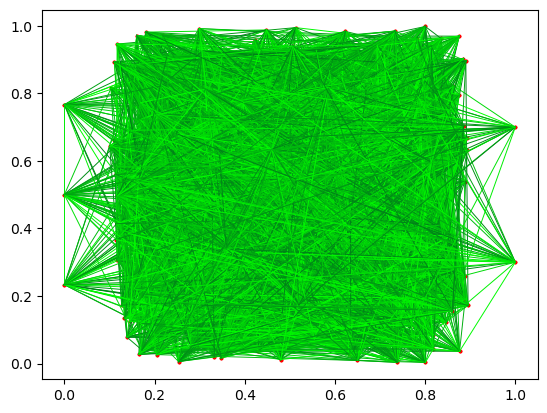

In [2]:
net = nlnn(hidden_neurons= 400, input_neurons = 3, output_neurons = 2)
net.initialise_structure(connection_probability_dropoff=3, connection_probabily_scalar=0.00003)
net.initialise_randomly()
net.display_net()

In [3]:
#load dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
#filtering out everythin but the 7s and 1s
mod_x_train = np.array([train_X[i] for i in range(len(train_X)) if train_y[i]==7 or train_y[i]==1])
mod_y_train = np.array([train_y[i] for i in range(len(train_X)) if train_y[i]==7 or train_y[i]==1])
mod_x_test = np.array([test_X[i] for i in range(len(test_X)) if test_y[i]==7 or test_y[i]==1])
mod_y_test = np.array([test_y[i] for i in range(len(test_X)) if test_y[i]==7 or test_y[i]==1])

#1-hot encoding
one_hot_y_train = np.zeros((len(mod_y_train), 2))
for i in range(len(mod_y_train)):
    if mod_y_train[i] == 1:
        one_hot_y_train[i][0]=1
    else:
        one_hot_y_train[i][1]=1
        
one_hot_y_test = np.zeros((len(mod_y_test), 2))
for i in range(len(mod_y_test)):
    if mod_y_test[i] == 1:
        one_hot_y_test[i][0]=1
    else:
        one_hot_y_test[i][1]=1
        
print(one_hot_y_train.shape)
print(one_hot_y_test.shape)
        
#flatten images
mod_x_train = mod_x_train.reshape(len(mod_x_train), 28*28)
mod_x_test = mod_x_test.reshape(len(mod_x_test), 28*28)

(13007, 2)
(2163, 2)


In [5]:
#setting up conventional model 
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_shape=(28*28,), activation='sigmoid'))
#model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


Metal device set to: Apple M1 Pro


2023-03-02 21:00:16.840654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 21:00:16.840756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.fit(mod_x_train, one_hot_y_train, epochs=10, batch_size=32)

Epoch 1/10


2023-03-02 21:00:16.925082: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-02 21:00:17.031734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


407/407 [==============================] - 2s 5ms/step - loss: 0.4955 - accuracy: 0.9663
Epoch 2/10
407/407 [==============================] - 2s 4ms/step - loss: 0.3234 - accuracy: 0.9891
Epoch 3/10
407/407 [==============================] - 2s 5ms/step - loss: 0.2409 - accuracy: 0.9909
Epoch 4/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1955 - accuracy: 0.9912
Epoch 5/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1596 - accuracy: 0.9932
Epoch 6/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1370 - accuracy: 0.9932
Epoch 7/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1196 - accuracy: 0.9939
Epoch 8/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9932
Epoch 9/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1006 - accuracy: 0.9937
Epoch 10/10
407/407 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9944


In [7]:
#evaluate model
accuracy = model.evaluate(mod_x_test, one_hot_y_test)
print(accuracy)

43/68 [=================>............] - ETA: 0s - loss: 0.1001 - accuracy: 0.9884

2023-03-02 21:00:36.280653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.9917
[0.09274350851774216, 0.9916782379150391]


In [25]:
print(mod_x_test.shape)
print(one_hot_y_test.shape)

(2163, 784)
(2163, 2)


In [8]:
#try on all classes
#one hot encode
def one_hot_encode(x):
    out = np.zeros((len(x), max(x)+1))
    for i in range(len(x)):
        out[i][x[i]] = 1
    return out

y_train_ohe = one_hot_encode(train_y)
y_test_ohe = one_hot_encode(test_y)
#flatten images
x_train = train_X.reshape(len(train_X), 28*28)
x_test = test_X.reshape(len(test_X), 28*28)


model_all = Sequential()
#model_all.add(Dense(3, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model_all.add(Dense(10, activation='softmax'))

# compile the keras model
model_all.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model_all.fit(x_train, y_train_ohe, epochs=10, batch_size=32)

Epoch 1/10
  31/1875 [..............................] - ETA: 6s - loss: 29.5260 - accuracy: 0.5252 

2023-03-02 21:00:36.712584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 3ms/step - loss: 5.8535 - accuracy: 0.8302
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8006 - accuracy: 0.8496
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.7707 - accuracy: 0.8536
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.6957 - accuracy: 0.8553
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.6622 - accuracy: 0.8570
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5148 - accuracy: 0.8610
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.4843 - accuracy: 0.8593
Epoch 8/10
1452/1875 [======================>.......] - ETA: 1s - loss: 4.5095 - accuracy: 0.8611

KeyboardInterrupt: 

In [9]:
#setting up evolutionary pipeline
performance_over_time = []
#creating initial population
population_size = 10
def create_population(population_size):
    population = []
    print("Creating networks")
    for i in range(population_size):
        net = nlnn()
        net.initialise_structure(connection_probability_dropoff=3, connection_probabily_scalar=0.00003)
        #net.initialise_randomly()
        population.append(net)
        print("|", end="")

    print("done!")
    return population


networks = create_population(population_size)

Creating networks
||||||||||done!


In [10]:
#record keeping
performance_over_time = [0]

In [11]:
def get_perf(t):
        return t[0]



#measure performance of all the networks
def evaluate_performance(population):
    performances = []
    print("evaluating performances", end="")
    for net in population:
        predictions = net.predict(mod_x_test, 10)[0]
        correct_count = len(mod_x_test)-(np.sum(np.abs(one_hot_y_test - predictions))/2)
        performances.append((correct_count/len(mod_x_test), net))
        #print(correct_count/len(mod_x_test))
        print("|", end="")
    print(" done!", end=" ")
    #sort by best performance
    performances.sort(key = get_perf, reverse = True)
    return performances

evaluated_networks = evaluate_performance(networks)
print("best performer of this generation :", evaluated_networks[0][0])
performance_over_time.append(evaluated_networks[0][0])

evaluating performances|||||||||| done! best performer of this generation : 0.6232085067036524


In [23]:
import multiprocess as mp

def evaluate_net(net):
    predictions = net.predict(mod_x_test, 10)[0]
    correct_count = len(mod_x_test)-(np.sum(np.abs(one_hot_y_test - predictions))/2)
    return (correct_count/len(mod_x_test), net)

def evaluate_performance_parallel(population):
    print("evaluating performances", end="")
    with mp.Pool() as pool:
        performances = pool.map(evaluate_net, population)
    print(" done!", end=" ")
    performances.sort(key = get_perf, reverse = True)
    return performances



In [14]:
#the n best performing networks will be selected
n = 3
mutation_range = 0.1

def repopulate(evaluated_networks, mutation_range, n):
    offspring_per_network = int(population_size/n)
    next_gen = [i[1] for i in evaluated_networks[:n]]
    for net in next_gen:
        next_gen = next_gen+net.reproduce(offspring_per_network, mutation_range)
    return next_gen
    
next_generation = repopulate(evaluated_networks, mutation_range,n)
print(type(next_generation))

<class 'list'>


In [21]:
generations = 40
mutation_range = 0.1
population_size = 20
for gen in range(generations):
    if(gen%25==0): 
        mutation_range/=2
        print("decreasing mutation range from",mutation_range*2,"to",mutation_range)
    print("generation "+str(gen), end=" ")
    evaluated_networks = evaluate_performance(next_generation)
    print(" best:", evaluated_networks[0][0])
    performance_over_time.append(evaluated_networks[0][0])
    next_generation = repopulate(evaluated_networks, mutation_range, n)
    

decreasing mutation range from 0.1 to 0.05
generation 0 evaluating performances||||||||||||||||||||| done!  best: 0.8867313915857605
generation 1 evaluating performances||||||||||||||||||||| done!  best: 0.8895053166897827
generation 2 evaluating performances||||||||||||||||||||| done!  best: 0.8895053166897827
generation 3 evaluating performances||||||||||||||||||||| done!  best: 0.8913546000924641
generation 4 evaluating performances||||||||||||||||||||| done!  best: 0.8927415626444752
generation 5 evaluating performances||||||||||||||||||||| done!  best: 0.8950531668978271
generation 6 evaluating performances||||||||||||||||||||| done!  best: 0.8969024503005085
generation 7 evaluating performances||||||||||||||||||||| done!  best: 0.8982894128525196
generation 8 evaluating performances||||||||||||||||||||| done!  best: 0.9001386962552012
generation 9 evaluating performances||||||||||||||||||||| done!  best: 0.9042995839112344
generation 10 evaluating performances||||||||||||||||||||

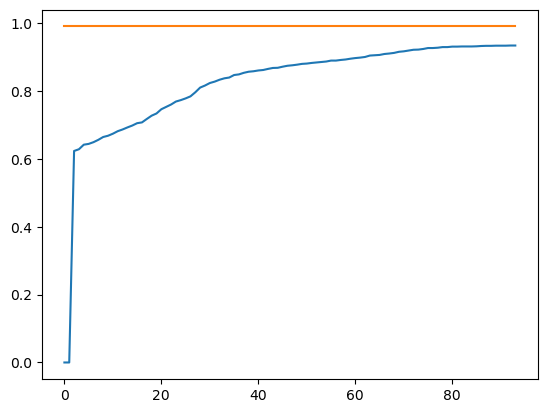

In [22]:
#TQDM -> loading bars

plt.plot(performance_over_time)
plt.plot(list(0.99*np.ones(len(performance_over_time))))
plt.show()

In [18]:
mat = evaluated_networks[0][1].adj_matrix
print(np.count_nonzero(mat)/evaluated_networks[0][1].dim_matrix**2)

0.055724600382768046
